# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Suraj Didwagh

**Student ID:**  202201040126
  
**Date of Submission:** 01/04/2025



**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Dataset Link :- https://www.kaggle.com/datasets/parulpandey/emotion-dataset

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).





In [ ]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('/content/training.csv')
test_df = pd.read_csv('/content/test.csv')
val_df = pd.read_csv('/content/validation.csv')

# Function to explore dataset
def explore_data(df, name):
    print(f"\nExploring {name} Dataset")
    print("-" * 50)

    # Display basic info
    print("Dataset Info:")
    print(df.info(), "\n")

    # Check missing values
    print("Missing Values:")
    print(df.isnull().sum(), "\n")

    # Display first few rows
    print("First 5 Rows:")
    print(df.head(), "\n")

    # Check label distribution if a label column exists
    label_column = None  # Update this based on your dataset
    for col in df.columns:
        if df[col].nunique() <= 10:  # Heuristic check for categorical labels
            label_column = col
            break

    if label_column:
        print(f"Label Distribution ({label_column}):")
        print(df[label_column].value_counts())

# Explore each dataset
explore_data(train_df, "Training")
explore_data(test_df, "Test")
explore_data(val_df, "Validation")



Exploring Training Dataset
--------------------------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None 

Missing Values:
text     0
label    0
dtype: int64 

First 5 Rows:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3 

Label Distribution (label):
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

Exploring Test Dataset
-----------------------

**Text Preprocessing:**

**Convert text to lowercase.**

In [ ]:
# Assuming the text column is named 'text' (update if different)
text_column = 'text'  # Change this if your text column has a different name

# Convert text to lowercase
def convert_to_lowercase(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    return text  # Return as is if not a string

# Apply to the datasets
train_df[text_column] = train_df[text_column].astype(str).apply(convert_to_lowercase)
test_df[text_column] = test_df[text_column].astype(str).apply(convert_to_lowercase)
val_df[text_column] = val_df[text_column].astype(str).apply(convert_to_lowercase)

# Display sample output
print(train_df.head())


                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Perform tokenization using NLTK or spaCy.**

In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load('en_core_web_sm')

# Function for tokenization using spaCy
def spacy_tokenize(text):
    if isinstance(text, str):
        return [token.text for token in nlp(text)]
    return []

# Apply tokenization to datasets
train_df['tokens'] = train_df['text'].astype(str).apply(spacy_tokenize)
test_df['tokens'] = test_df['text'].astype(str).apply(spacy_tokenize)
val_df['tokens'] = val_df['text'].astype(str).apply(spacy_tokenize)

# Display sample output
print(train_df[['text', 'tokens']].head())


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                              tokens  
0                     [i, did, nt, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i, m, grabbing, a, minute, to, post, i, feel,...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]  


In [ ]:
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function for tokenization
def tokenize_text(text):
    try:
        if isinstance(text, str):  # Ensure text is a string
            # Use the standard word_tokenize function which uses the punkt tokenizer
            tokens = word_tokenize(text.lower())
            return tokens
        return []  # Return empty list if not a string
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

# Make sure the dataframes exist before using them
# If they aren't defined yet, uncomment and modify these lines
# train_df = pd.read_csv('train_data.csv')  # replace with your actual data source
# test_df = pd.read_csv('test_data.csv')    # replace with your actual data source
# val_df = pd.read_csv('val_data.csv')      # replace with your actual data source

# Apply tokenization to datasets with error handling
train_df['tokens'] = train_df['text'].astype(str).apply(tokenize_text)
test_df['tokens'] = test_df['text'].astype(str).apply(tokenize_text)
val_df['tokens'] = val_df['text'].astype(str).apply(tokenize_text)

# Display sample output
print("Sample tokenization results:")
print(train_df[['text', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample tokenization results:
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                              tokens  
0                       [i, didnt, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [im, grabbing, a, minute, to, post, i, feel, g...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]  


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to remove stopwords using spaCy
def spacy_remove_stopwords(text):
    if isinstance(text, str):
        doc = nlp(text)  # Process text
        filtered_tokens = [token.text for token in doc if not token.is_stop]  # Remove stopwords
        return " ".join(filtered_tokens)
    return ""

# Apply stopword removal to datasets
train_df['text_no_stopwords'] = train_df['text'].astype(str).apply(spacy_remove_stopwords)
test_df['text_no_stopwords'] = test_df['text'].astype(str).apply(spacy_remove_stopwords)
val_df['text_no_stopwords'] = val_df['text'].astype(str).apply(spacy_remove_stopwords)

# Display sample output
print(train_df[['text', 'text_no_stopwords']].head())


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                             text_no_stopwords  
0                           nt feel humiliated  
1  feeling hopeless damned hopeful cares awake  
2     m grabbing minute post feel greedy wrong  
3    feeling nostalgic fireplace know property  
4                              feeling grouchy  


**Remove stopwords using NLTK or spaCy.**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Get the English stopwords list
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
        return " ".join(filtered_tokens)
    return ""

# Apply stopword removal to datasets
train_df['text_no_stopwords'] = train_df['text'].astype(str).apply(remove_stopwords)
test_df['text_no_stopwords'] = test_df['text'].astype(str).apply(remove_stopwords)
val_df['text_no_stopwords'] = val_df['text'].astype(str).apply(remove_stopwords)

# Display sample output
print(train_df[['text', 'text_no_stopwords']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                   text_no_stopwords  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to remove stopwords using spaCy
def spacy_remove_stopwords(text):
    if isinstance(text, str):
        doc = nlp(text)  # Process text
        filtered_tokens = [token.text for token in doc if not token.is_stop]  # Remove stopwords
        return " ".join(filtered_tokens)
    return ""

# Apply stopword removal to datasets
train_df['text_no_stopwords'] = train_df['text'].astype(str).apply(spacy_remove_stopwords)
test_df['text_no_stopwords'] = test_df['text'].astype(str).apply(spacy_remove_stopwords)
val_df['text_no_stopwords'] = val_df['text'].astype(str).apply(spacy_remove_stopwords)

# Display sample output
print(train_df[['text', 'text_no_stopwords']].head())


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                             text_no_stopwords  
0                           nt feel humiliated  
1  feeling hopeless damned hopeful cares awake  
2     m grabbing minute post feel greedy wrong  
3    feeling nostalgic fireplace know property  
4                              feeling grouchy  


**Apply stemming using PorterStemmer or SnowballStemmer.**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer
nltk.download('punkt')

# Initialize PorterStemmer
porter = PorterStemmer()

# Function to apply Porter stemming
def apply_porter_stemming(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization
        stemmed_tokens = [porter.stem(word) for word in tokens]  # Apply stemming
        return " ".join(stemmed_tokens)
    return ""

# Apply Porter stemming to datasets
train_df['Porter_Stemmed'] = train_df[text_column].astype(str).apply(apply_porter_stemming)
test_df['Porter_Stemmed'] = test_df[text_column].astype(str).apply(apply_porter_stemming)
val_df['Porter_Stemmed'] = val_df[text_column].astype(str).apply(apply_porter_stemming)

# Display sample output
print(train_df[[text_column, 'Porter_Stemmed']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                      Porter_Stemmed  
0                                i didnt feel humili  
1  i can go from feel so hopeless to so damn hope...  
2        im grab a minut to post i feel greedi wrong  
3  i am ever feel nostalg about the fireplac i wi...  
4                                  i am feel grouchi  


In [ ]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer
nltk.download('punkt')

# Initialize SnowballStemmer
snowball = SnowballStemmer('english')

# Function to apply Snowball stemming
def apply_snowball_stemming(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization
        stemmed_tokens = [snowball.stem(word) for word in tokens]  # Apply stemming
        return " ".join(stemmed_tokens)
    return ""

# Apply Snowball stemming to datasets
train_df['Snowball_Stemmed'] = train_df[text_column].astype(str).apply(apply_snowball_stemming)
test_df['Snowball_Stemmed'] = test_df[text_column].astype(str).apply(apply_snowball_stemming)
val_df['Snowball_Stemmed'] = val_df[text_column].astype(str).apply(apply_snowball_stemming)

# Display sample output
print(train_df[[text_column, 'Snowball_Stemmed']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                    Snowball_Stemmed  
0                                i didnt feel humili  
1  i can go from feel so hopeless to so damn hope...  
2        im grab a minut to post i feel greedi wrong  
3  i am ever feel nostalg about the fireplac i wi...  
4                                  i am feel grouchi  


**Apply lemmatization using WordNetLemmatizer.**

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenization
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization
        return " ".join(lemmatized_tokens)
    return ""

# Apply lemmatization to datasets
train_df['Lemmatized_Text'] = train_df[text_column].astype(str).apply(apply_lemmatization)
test_df['Lemmatized_Text'] = test_df[text_column].astype(str).apply(apply_lemmatization)
val_df['Lemmatized_Text'] = val_df[text_column].astype(str).apply(apply_lemmatization)

# Display sample output
print(train_df[[text_column, 'Lemmatized_Text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                     Lemmatized_Text  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy  


**Vectorization Techniques:**

**Convert text data into numerical format using TF-IDF and CountVectorizer.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

# Convert text data to numerical format using TF-IDF
train_tfidf = tfidf_vectorizer.fit_transform(train_df[text_column])
test_tfidf = tfidf_vectorizer.transform(test_df[text_column])
val_tfidf = tfidf_vectorizer.transform(val_df[text_column])

# Convert text data to numerical format using CountVectorizer
train_count = count_vectorizer.fit_transform(train_df[text_column])
test_count = count_vectorizer.transform(test_df[text_column])
val_count = count_vectorizer.transform(val_df[text_column])

# Print shape of transformed data
print("TF-IDF Shape (Train):", train_tfidf.shape)
print("TF-IDF Shape (Test):", test_tfidf.shape)
print("TF-IDF Shape (Validation):", val_tfidf.shape)

print("CountVectorizer Shape (Train):", train_count.shape)
print("CountVectorizer Shape (Test):", test_count.shape)
print("CountVectorizer Shape (Validation):", val_count.shape)


TF-IDF Shape (Train): (16000, 15186)
TF-IDF Shape (Test): (2000, 15186)
TF-IDF Shape (Validation): (2000, 15186)
CountVectorizer Shape (Train): (16000, 15186)
CountVectorizer Shape (Test): (2000, 15186)
CountVectorizer Shape (Validation): (2000, 15186)


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).



Dataset is already in the format of training testing and validation
- **Training Set**: 16,000 samples (**80%**)  
- **Testing Set**: 2,000 samples (**10%**)  
- **Validation Set**: 2,000 samples (**10%**)  

### Key Observations:  
1. The training set has the correct **80%** proportion.  
2. The remaining **20%** is split into **10% testing** and **10% validation** instead of a full 20% testing set.  
3. If you need a strict **80% training and 20% testing** split, the validation set should be merged with the test set.  

### Next Steps:  
- **Keep the current split** if you want a separate validation set for model tuning.  
- **Merge validation into the test set** if you want a strict **80%-20%** split.  


**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       581
           1       0.85      0.95      0.90       695
           2       0.80      0.65      0.72       159
           3       0.89      0.83      0.86       275
           4       0.87      0.82      0.84       224
           5       0.89      0.50      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.87      0.87      0.87      2000


Classification Report - Naïve Bayes:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       581
           1       0.72      0.98      0.83       695
           2       0.97      0.25      0.39       159
           3       0.96      0.56      0.71       275
           4       0.89      0.52      0.66       224
           5       1.00      0.05      0.09   

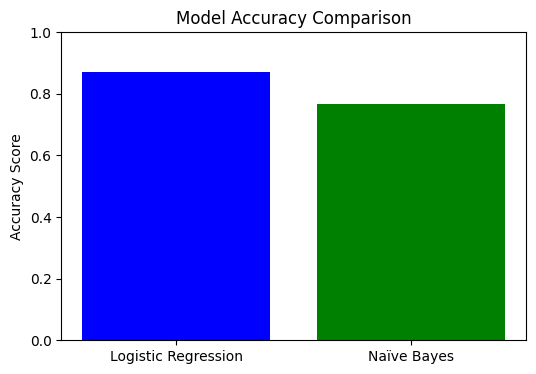

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("test.csv")

# Assuming the dataset has 'text' and 'label' columns
X_train, y_train = train_df['text'], train_df['label']
X_test, y_test = test_df['text'], test_df['label']

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
log_reg_pred = log_reg.predict(X_test_tfidf)

# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Compute accuracy scores
log_reg_acc = accuracy_score(y_test, log_reg_pred)
nb_acc = accuracy_score(y_test, nb_pred)

# Print classification reports
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, log_reg_pred))
print("\nClassification Report - Naïve Bayes:\n", classification_report(y_test, nb_pred))

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(["Logistic Regression", "Naïve Bayes"], [log_reg_acc, nb_acc], color=['blue', 'green'])
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

Logistic Regression Metrics:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       581
           1       0.85      0.95      0.90       695
           2       0.80      0.65      0.72       159
           3       0.89      0.83      0.86       275
           4       0.87      0.82      0.84       224
           5       0.89      0.50      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.87      0.87      0.87      2000

Naïve Bayes Metrics:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       581
           1       0.72      0.98      0.83       695
           2       0.97      0.25      0.39       159
           3       0.96      0.56      0.71       275
           4       0.89      0.52      0.66       224
           5       1.00      0.05      0.09        66

    accuracy             

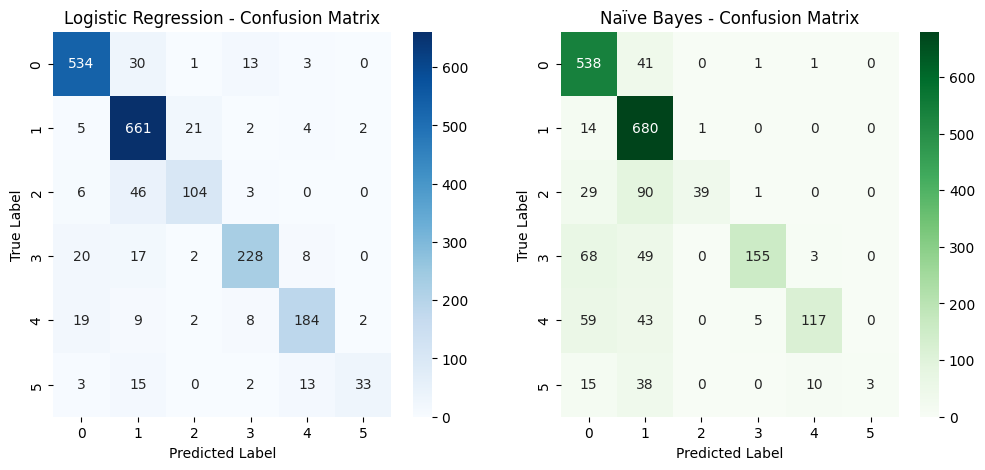

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("test.csv")

# Assuming the dataset has 'text' and 'label' columns
X_train, y_train = train_df['text'], train_df['label']
X_test, y_test = test_df['text'], test_df['label']

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
log_reg_pred = log_reg.predict(X_test_tfidf)

# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Compute evaluation metrics
log_reg_report = classification_report(y_test, log_reg_pred, output_dict=True)
nb_report = classification_report(y_test, nb_pred, output_dict=True)

# Print evaluation metrics
print("Logistic Regression Metrics:\n", classification_report(y_test, log_reg_pred))
print("Naïve Bayes Metrics:\n", classification_report(y_test, nb_pred))

# Confusion Matrices
log_reg_cm = confusion_matrix(y_test, log_reg_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Naïve Bayes - Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()


**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Suraj Didwagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/surajdidwagh/DL_practical-Assignment-4.git

Signature: Suraj Didwagh

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion